# KMeans кластеризация для сегментации клиентов

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

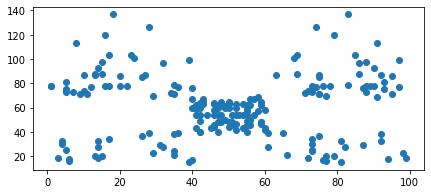

In [7]:
plt.figure(figsize=(7,3))
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'])

In [8]:
X = df.iloc[:, [3,4]].values

## Построение модели
Алгоритм KMeans - для определения оптимального числа кластеров, KMeans++ с помощью метода локтя вычисляет K для KMeans, я буду использовать метод ELBOW на KMEANS++ 

###### *Метод локтя – это графический метод, который вычисляет сумму квадратов расстояний между точками и среднее значение.*
###### *inertia - Сумма квадратов расстояний выборок до их ближайшего центра кластера, взвешенных по весам выборок, если они указаны.*

In [13]:
inertia=[]

#предположим, что максимально возможное кол-во кластеров - 10
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

c:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Визуализация метода локтя для получения оптимального значения K

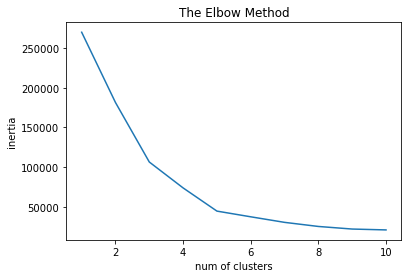

In [14]:
plt.plot(range(1,11), inertia)
plt.title('The Elbow Method')
plt.xlabel('num of clusters')
plt.ylabel('inertia')
plt.show()

Видно, что последний локоть приходится на k=5 независимо от того, какой диапазон мы выбираем. Например - (1,21) будет аналогичное поведени, но визуализировать локоть тогда сложнее

###### *Когда значение k равно 1, сумма квадрата внутри кластера будет большой. По мере увеличения значения k сумма квадратов расстояний внутри кластера будет уменьшаться. Далее строим график между значениями k и суммой квадрата внутри кластера, чтобы получить значение k. Будет видно, что значение в какой-то момент резко уменьшится. Эта точка будет считаться оптимальным значением k.*

In [11]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

## Визуализация всех кластеров

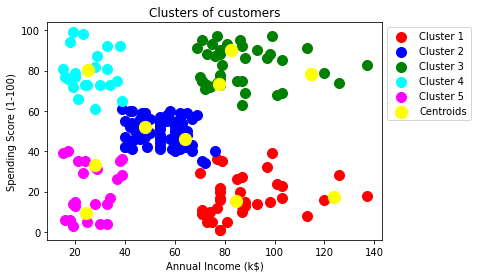

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Интерпретация модели 
- кластер 1 (красный) -> зарабатывает много, но тратит мало
- кластер 2 (синий) -> средний доход и расходы 
- кластер 3 (зеленый) -> зарабатывает много, а также тратит много [целевой набор]
- кластер 4 (голубой) -> зарабатывает мало, но тратит много
- Кластер 5 (пурпурный) -> зарабатывает мало , тратит мало
